In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('rel_abund_16S_ABC_qpcr_adj.csv')
# Filter the columns
barcode_columns = [col for col in df.columns if col.startswith('barcode')]

# Include 'phyla' in our columns to group by
columns_to_keep = ['species'] + barcode_columns

# Filter the dataframe
df_filtered = df[columns_to_keep]

df_filtered.set_index('species', inplace = True)
print(df_filtered.shape)

df_filtered.head()

(2932, 242)


,barcode01A,barcode02A,barcode03A,barcode04A,barcode05A,barcode06A,barcode07A,barcode08A,barcode09A,barcode10A,...,barcode74C,barcode75C,barcode76C,barcode77C,barcode78C,barcode79C,barcode80C,barcode81C,barcode82C,barcode83C
species,,,,,,,,,,,,,,,,,,,,,
Limisphaera ngatamarikiensis,4.790643e+07,8.900058e+06,6.556187e+06,4.058267e+06,1.481371e+07,1.248277e+07,9.179437e+06,1.256743e+07,1.288254e+07,1.075351e+07,...,4.566729e+06,7.353860e+06,9.589360e+06,6.304615e+06,1.198204e+07,4.900868e+06,7.607659e+06,1.058179e+07,9.850756e+06,2.045827e+07
Chthoniobacter flavus,1.005005e+08,1.458369e+07,1.333172e+07,8.218814e+06,2.351699e+07,2.297672e+07,1.741986e+07,2.765105e+07,2.212359e+07,2.451805e+07,...,2.074405e+07,1.717645e+07,4.290978e+07,2.192519e+07,2.703182e+07,2.691745e+07,1.802863e+07,3.150169e+07,2.532344e+07,2.887292e+07
Terrimicrobium sacchariphilum,2.003277e+07,3.586512e+06,3.898604e+06,1.569019e+06,1.151106e+07,3.388559e+06,4.095689e+06,8.534617e+06,NaN,NaN,...,3.208118e+06,4.474294e+06,6.029341e+06,4.190428e+06,4.985832e+06,3.678799e+06,3.232210e+06,4.305815e+06,5.350845e+06,5.241603e+06
Roseimicrobium gellanilyticum,1.699301e+07,1.366139e+06,NaN,1.300566e+06,NaN,3.417414e+06,NaN,2.883911e+06,NaN,NaN,...,6.388427e+05,1.330010e+06,1.684596e+06,1.316412e+06,4.534599e+06,7.525840e+05,1.057274e+06,1.428242e+06,1.064896e+06,1.946614e+06
Candidatus Koribacter versatilis,3.336123e+07,2.101814e+07,9.636461e+06,3.775937e+06,7.318052e+07,1.826578e+07,8.191674e+06,1.594069e+07,1.407426e+07,1.337826e+07,...,1.095368e+07,4.779716e+06,6.092310e+06,1.188305e+07,4.613590e+06,5.574400e+06,1.112226e+07,1.564943e+07,6.245699e+07,2.671142e+07


In [16]:
metadata.columns.values

array(['Unnamed: 0', 'Sample name', 'Sample date', 'Sample ID', 'Plot',
       'ID', 'Nitrogen', 'Water', 'Block', 'Direction', 'Barcode',
       'Notes', 'Barcode_key', 'Run', '% Moisture Content (MC)',
       'Moisture as decimal', 'lb/bu', 'Weight (g) 0% MC',
       'Weight (g) 15.5% MC', 'Weight (kg) 0% MC', 'Weight (kg) 15.5% MC',
       'Harvest area (ac)', 'Harvest area (ha)',
       'Grain Yield, 0% MC bu/ac', 'Grain Yield, 15.5% MC bu/ac',
       'Grain Yield, 0% MC kg/ha', 'Grain Yield, 15.5% MC kg/ha',
       'Annual ET, mm', 'Water trt target', 'N trt target',
       'lbs NH4-N / ac', 'lbs NO3-N / ac', 'Total N / ac', 'qPCR_DW',
       'qPCR_FW', 'qPCR_DW_log', 'qPCR_FW_log', 'GWC', 'Stems', 'Leaves',
       'Shoots', 'Grain 0% MC'], dtype=object)

In [30]:
metadata = pd.read_csv('mapping_file_with_metadata_harvest_biomass_2022.csv')

# Transpose the first dataframe
grouped_df_transposed = grouped_df.transpose()

# Join the two dataframes
merged_df = grouped_df_transposed.join(metadata.set_index('Barcode_key'), how='left')
# Replace the numeric values with the provided categories
merged_df['Water'].replace({1: 'High', 2: 'Low'}, inplace=True)
merged_df['Nitrogen'].replace({1: 'Low', 5: 'Optimal', 6: 'High'}, inplace=True)

# Filter to grain yeild measurement date
filtered_df = merged_df[merged_df['Sample date'] == '2021-09-23']

# Remove columns that sum to zero
filtered_df = filtered_df.loc[:, filtered_df.sum() != 0]

# Display the first few rows of the filtered DataFrame
filtered_df.head()

,Achromobacter insolitus,Acidibacter ferrireducens,Acidibrevibacterium fodinaquatile,Acidicapsa acidisoli,Acidimicrobium ferrooxidans,Acidipila dinghuensis,Acidipila rosea,Acidisarcina polymorpha,Acidisphaera rubrifaciens,Aciditerrimonas ferrireducens,...,lbs NO3-N / ac,Total N / ac,qPCR_DW,qPCR_FW,qPCR_DW_log,qPCR_FW_log,GWC,Stems,Leaves,Grain 0% MC
barcode31A,0.0,2.919591e+07,9.285344e+06,0.0,0.0,0.0,0.0,5.735746e+06,0.0,1.916502e+07,...,0.810208,1.064657,2.607161e+09,2.828260e+09,21.681528,21.762927,0.078175,379.307956,153.0,754.416
barcode32A,0.0,2.215301e+07,1.371850e+07,0.0,0.0,0.0,0.0,0.000000e+00,0.0,2.215767e+07,...,1.152276,2.642005,3.223848e+09,3.497245e+09,21.893841,21.975241,0.078175,379.307956,153.0,754.416
barcode34A,0.0,5.105635e+06,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1.292452e+07,...,1.538347,4.591253,1.024409e+09,1.123453e+09,20.747382,20.839673,0.088160,275.188400,159.0,641.845
barcode38A,0.0,4.816870e+07,1.584544e+07,0.0,0.0,0.0,0.0,0.000000e+00,0.0,2.351348e+07,...,1.109243,1.925389,3.374921e+09,3.765637e+09,21.939638,22.049183,0.103758,401.956780,182.0,974.757
barcode39A,0.0,3.901146e+07,8.226858e+06,0.0,0.0,0.0,0.0,0.000000e+00,0.0,2.131174e+07,...,0.980547,2.304058,2.869886e+09,3.133233e+09,21.777538,21.865331,0.084049,172.764293,112.0,243.620


# Random forest

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Assuming df is your DataFrame
df = filtered_df.copy()

# Define a dictionary to store results
results = {}

# Get unique combinations of 'Water' and 'Nitrogen'
combinations = df[['Water', 'Nitrogen']].drop_duplicates().values.tolist()

# drop rows where either 'Water' or 'Nitrogen' is NaN
df = df.dropna(subset=['Water', 'Nitrogen'])

# Find 'Unnamed: 0' column index
index_unnamed = df.columns.get_loc("Unnamed: 0")

# Create a combined target column
df['Target'] = df['Water'].astype(str) + '_' + df['Nitrogen'].astype(str)

# Loop over each unique combination
for combo in set(df['Target']):
    df_subset = df[df['Target'] == combo]
    
    y = df_subset['Grain 0% MC']
    # Select only bacterial species columns (all columns before 'Unnamed: 0')
    X = df_subset.iloc[:, :index_unnamed]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the parameter grid for the grid search
    param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]}
    
    # Initialize a RandomForestRegressor
    regr = RandomForestRegressor(random_state=42)
    
    # Initialize GridSearchCV with the regressor and parameter grid
    grid_search = GridSearchCV(regr, param_grid, cv=2)
    
    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)
    
    # Use the best estimator from grid search to make predictions on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Compute mean squared error of the model
    mse = mean_squared_error(y_test, y_pred)
    
    # Get feature importances from the best estimator
    importances = grid_search.best_estimator_.feature_importances_
    features = X_train.columns
    feature_importances = sorted(zip(importances, features), reverse=True)[:10]
    
    # Compute R^2 of the model
    r2 = r2_score(y_test, y_pred)

    # Store results in the dictionary
    results[combo] = {
        'mse': mse,
        'r2': r2,
        'top_features': feature_importances,
        'best_params': grid_search.best_params_
    }

# Plotting

In [32]:
# Specify the custom order
custom_order = ['Low_Low', 'Low_Optimal', 'Low_High', 'High_Low','High_Optimal', 'High_High']

# Create a new dictionary based on the custom order
sorted_results = {key: results[key] for key in custom_order}

In [26]:
import matplotlib.pyplot as plt

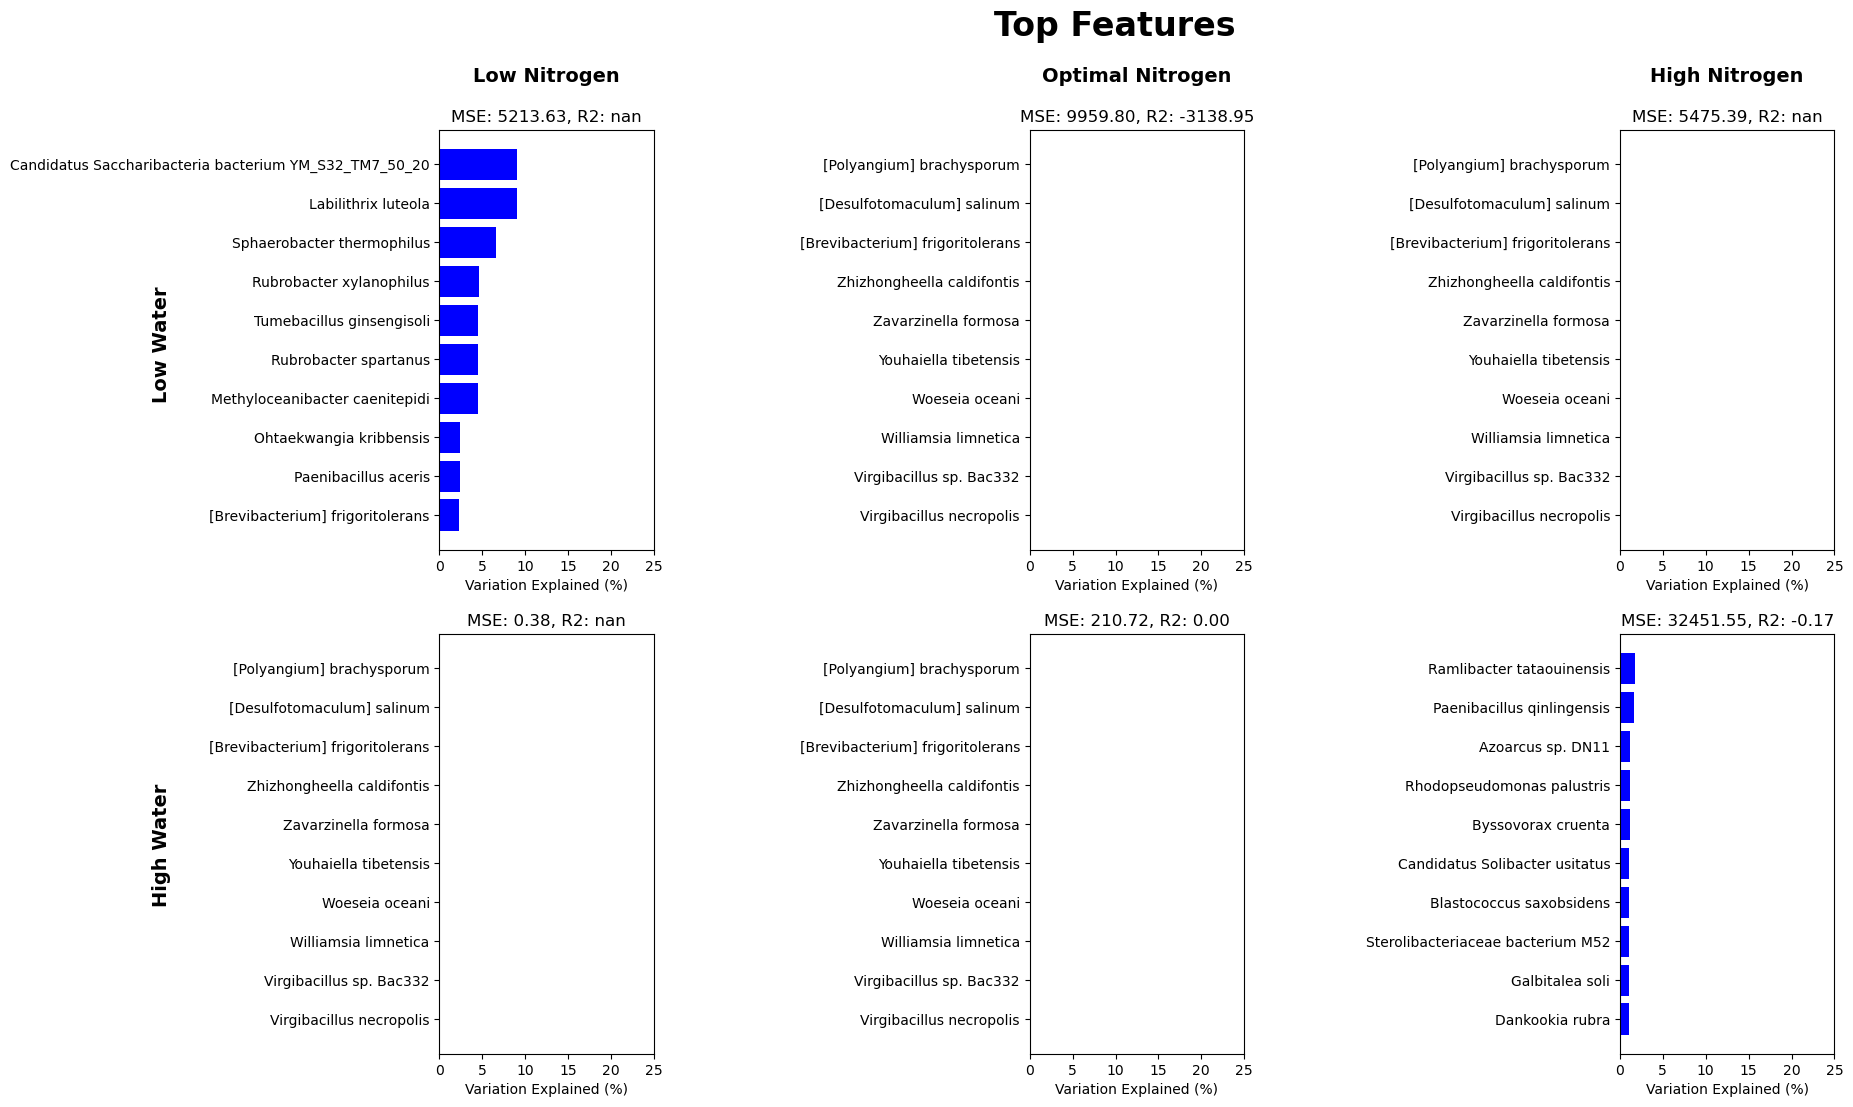

In [33]:
# Create a list of dataframes for each result
dataframes = []
for key, result in sorted_results.items():
    top_features = [feature[1] for feature in result['top_features']]
    values = [feature[0] * 100 for feature in result['top_features']]  # Convert values to percentages
    df = pd.DataFrame({'top_features': top_features, key: values})
    dataframes.append(df)

# Set the common x-axis limits for all subplots
common_xlim = (0, 25)

# Plotting subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Top Features", fontsize=24, fontweight='bold')  # Add main title to the plot

for i, df in enumerate(dataframes):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.barh(df['top_features'], df.iloc[:, 1], color='b')
    
    # Get the key for the current result
    key = df.columns[1]
    
    # Get the mse and r2 values for the current result
    mse = sorted_results[key]['mse']
    r2 = sorted_results[key]['r2']
    
    # Set the title with key, mse, and r2 values
    title = f"MSE: {mse:.2f}, R2: {r2:.2f}"
    ax.set_title(title)
    ax.set_xlabel('Variation Explained (%)')  # Update x-axis label
#     ax.set_ylabel('Top Features')
    ax.invert_yaxis()
    
    # Set the x-axis limits
    ax.set_xlim(common_xlim)

# Adding annotations for the water and nitrogen levels
plt.text(0.5, 1.15, 'Low Nitrogen', transform=axes[0, 0].transAxes, fontsize=14, fontweight='bold', va='top', ha='center')
plt.text(0.5, 1.15, 'Optimal Nitrogen', transform=axes[0, 1].transAxes, fontsize=14, fontweight='bold', va='top', ha='center')
plt.text(0.5, 1.15, 'High Nitrogen', transform=axes[0, 2].transAxes, fontsize=14, fontweight='bold', va='top', ha='center')
plt.text(-1.25, 0.35, 'Low Water', transform=axes[0, 0].transAxes, fontsize=14, fontweight='bold', va='bottom', ha='right', rotation='vertical')
plt.text(-1.25, 0.35, 'High Water', transform=axes[1, 0].transAxes, fontsize=14, fontweight='bold', va='bottom', ha='right', rotation='vertical')

plt.subplots_adjust(wspace=1.75)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the main title

# Random forest on categorical treatments

In [6]:
# Assuming df is your DataFrame
df = merged_df.copy()

# Find 'Unnamed: 0' column index
index_unnamed = df.columns.get_loc("Unnamed: 0")

# Select only bacterial species columns (all columns before 'Unnamed: 0')
X = df.iloc[:, :index_unnamed]

# Create a combined target column
df['Target'] = df['Water'].astype(str) + '_' + df['Nitrogen'].astype(str)

# Label encode the target
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

y = df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [8]:
# Train a new Random Forest model with best parameters
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                 max_depth=grid_search.best_params_['max_depth'],
                                 min_samples_split=grid_search.best_params_['min_samples_split'])

# Train the model
best_rf.fit(X_train, y_train)

# Predict the test set results
y_pred = best_rf.predict(X_test)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get feature importance
feature_importances = best_rf.feature_importances_

# Get the top 10 features
features = pd.DataFrame()
features['Feature'] = X.columns
features['Importance'] = feature_importances
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)

print("Top 10 Important Features\n", features.head(10))

Accuracy: 21.74%
Top 10 Important Features
                           Feature  Importance
0  Melghirimyces thermohalophilus    0.007791
1             Bacillus megaterium    0.006499
2         Egibacter rhizosphaerae    0.006329
3                   Baekduia soli    0.006305
4             Bacillus sp. 1NLA3E    0.006216
5                 Gaiella occulta    0.005812
6       Acidibacter ferrireducens    0.005742
7             Conexibacter woesei    0.005622
8      Bradyrhizobium sp. KBS0725    0.005496
9   Terrimicrobium sacchariphilum    0.005427


In [13]:
from sklearn.multiclass import OneVsRestClassifier

# create a binary label for each class
Y_bin = LabelBinarizer().fit_transform(y_train)

# create a OneVsRestClassifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                                 max_depth=grid_search.best_params_['max_depth'],
                                                 min_samples_split=grid_search.best_params_['min_samples_split']))

# Train the model
clf.fit(X_train, Y_bin)

# Get the list of classes
classes = le.classes_

# For each class
for i in range(len(classes)):
    # Get feature importances for this class
    feature_importances = clf.estimators_[i].feature_importances_
    
    # Create a DataFrame for easy sorting and printing
    features = pd.DataFrame()
    features['Feature'] = X.columns
    features['Importance'] = feature_importances
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.reset_index(drop=True, inplace=True)

    print(f"\nTop 10 Important Features for Class {classes[i]}:\n", features.head(10))



Top 10 Important Features for Class High_High:
                            Feature  Importance
0  Planctomycetes bacterium ETA_A1    0.016441
1         Pseudolabrys taiwanensis    0.010813
2             Tepidisphaera mucosa    0.009643
3        Acidibacter ferrireducens    0.008731
4                Tumebacillus soli    0.008194
5                    Baekduia soli    0.007850
6           Pseudolabrys sp. FHR47    0.007451
7         Caldimonas hydrothermale    0.007153
8              Conexibacter woesei    0.007013
9        Rhodoplanes sp. Z2-YC6860    0.006821

Top 10 Important Features for Class High_Low:
                      Feature  Importance
0   Microvirga pakistanensis    0.012261
1     Microvirga makkahensis    0.010812
2     Shimazuella kribbensis    0.009730
3    Rubrobacter indicoceani    0.009258
4  Clostridium swellfunianum    0.009132
5      Nitrosospira briensis    0.008935
6     Sporichthya polymorpha    0.008136
7     Bacillus thuringiensis    0.007920
8  Microlunatus p

In [21]:
# At the point where you originally transformed your labels:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Make predictions
y_bin_pred = clf.predict(X_test)

# Compute and print accuracy for each class
for i in range(len(lb.classes_)):
    class_accuracy = accuracy_score(y_test[:, i], y_bin_pred[:, i])
    print(f'Accuracy for class {lb.classes_[i]}: {class_accuracy}')

# Convert the multilabel binarized y_test and y_bin_pred back to its original form
y_test_original = lb.inverse_transform(y_test)
y_pred_original = lb.inverse_transform(y_bin_pred)

Accuracy for class 0: 0.7391304347826086
Accuracy for class 1: 0.8913043478260869
Accuracy for class 2: 0.782608695652174
Accuracy for class 3: 0.8478260869565217
Accuracy for class 4: 0.8913043478260869
Accuracy for class 5: 0.8695652173913043
Accuracy for class 6: 0.9565217391304348


In [22]:
from sklearn.metrics import classification_report

In [24]:
# Convert integer classes to strings
target_names = [str(i) for i in lb.classes_]

# Calculate metrics for each label, and find their average (weighted by support)
classification_rep = classification_report(y_test_original, y_pred_original, target_names=target_names)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5
           5       1.00      0.14      0.25         7
           6       0.00      0.00      0.00         2

   micro avg       0.33      0.02      0.04        46
   macro avg       0.14      0.02      0.04        46
weighted avg       0.15      0.02      0.04        46
 samples avg       0.02      0.02      0.02        46



/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
